# Advance Bank Term Deposit

## Introduction
This notebook provides a detailed analysis of customer behavior and insights into factors influencing term deposit subscription.

## Load Dataset

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('data.csv')
df.head()
#

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Customer Demographics Analysis

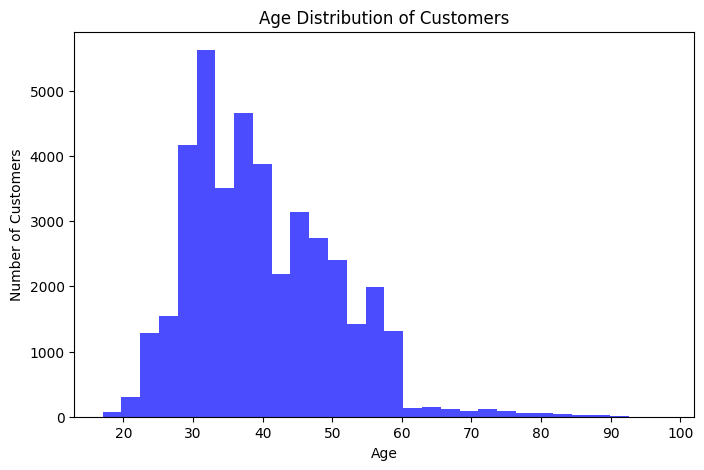

In [9]:
# Age distribution
plt.figure(figsize=(8,5))
plt.hist(df['age'], bins=30, color='blue', alpha=0.7)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64


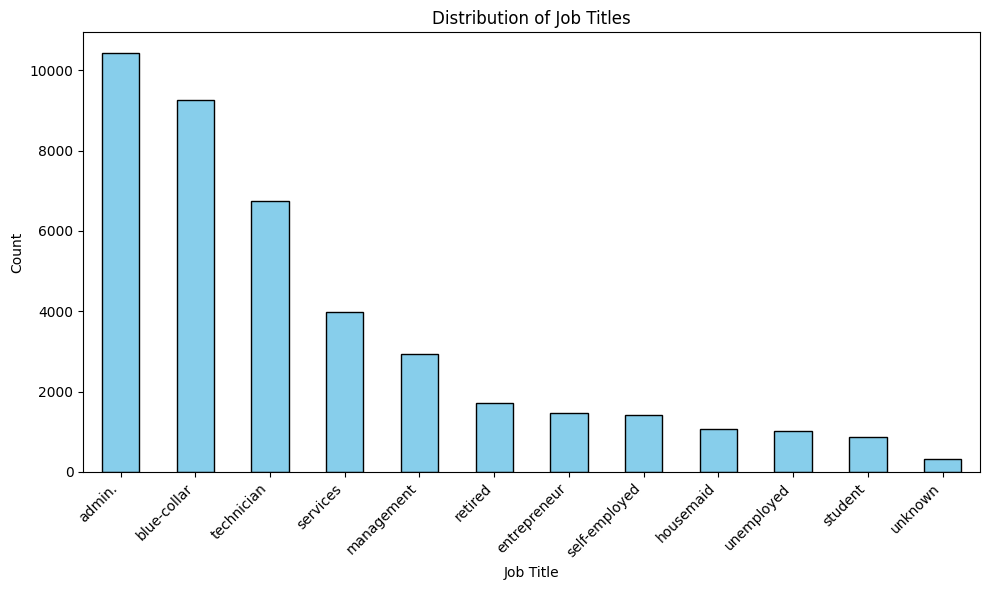

In [17]:
# job distribution
job_counts = df['job'].value_counts()

# Display counts
print(job_counts)

# Plot distribution as a bar chart
plt.figure(figsize=(10,6))
job_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Distribution of Job Titles")
plt.xlabel("Job Title")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Balance & Deposit Trends

/tmp/ipython-input-3970618121.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='y', y='euribor3m', data=avg_balance_by_deposit, palette='viridis')


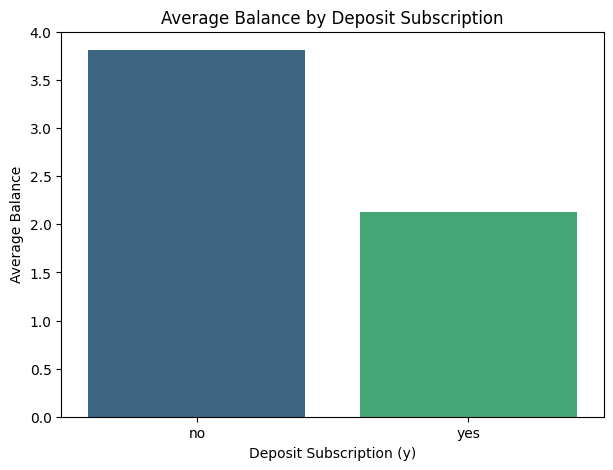

In [20]:
# Average balance by deposit subscription
avg_balance_by_deposit = df.groupby('y')['euribor3m'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.barplot(x='y', y='euribor3m', data=avg_balance_by_deposit, palette='viridis')
plt.title('Average Balance by Deposit Subscription')
plt.xlabel('Deposit Subscription (y)')
plt.ylabel('Average Balance')
plt.show()

## Campaign Effectiveness

In [24]:
# Contact method analysis
contact_counts = df['contact'].value_counts()
display(avg_balance_by_deposit)
# Display counts
print(contact_counts)



,y,euribor3m
0,no,3.811491
1,yes,2.123135


contact
cellular     26144
telephone    15044
Name: count, dtype: int64


<Figure size 1200x600 with 0 Axes>

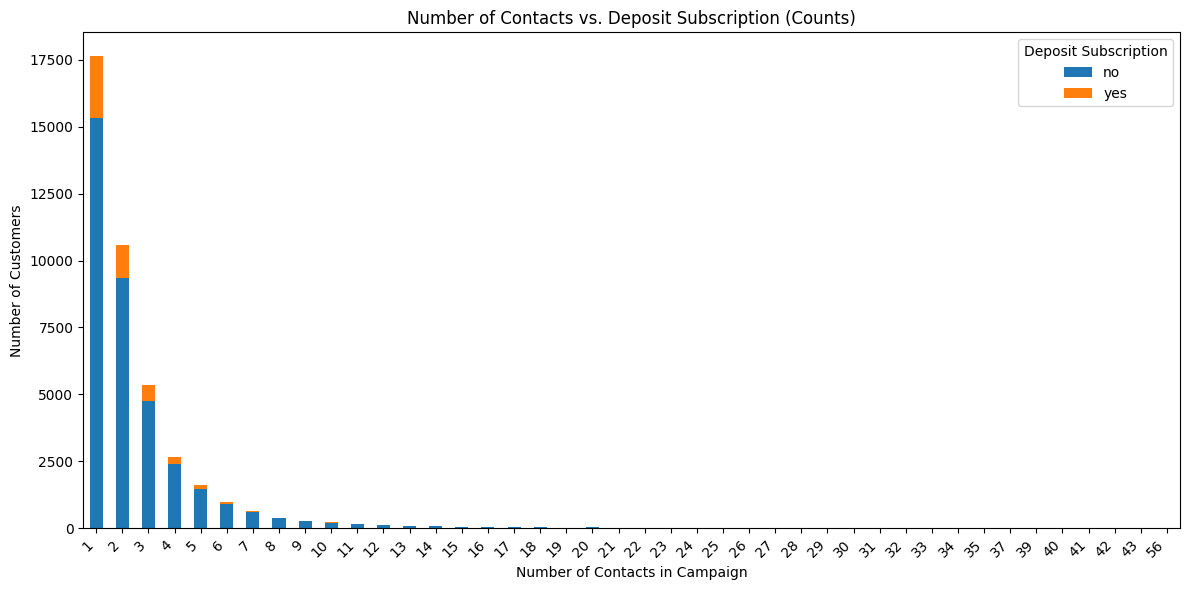

<Figure size 1200x600 with 0 Axes>

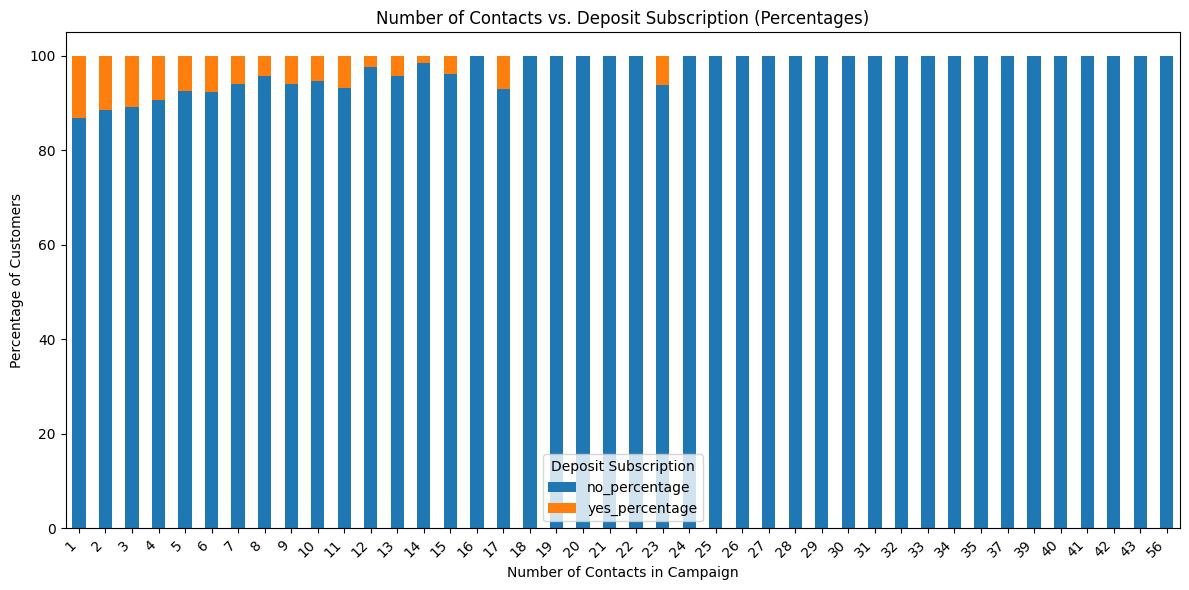

Visualizations for campaign effectiveness generated.


In [44]:
# Number of contacts vs deposit subscription
import matplotlib.pyplot as plt
import pandas as pd

# 1. Group the DataFrame df by 'campaign' and 'y' columns, then count the occurrences
campaign_vs_deposit = df.groupby(['campaign', 'y']).size().reset_index(name='Count')

# 2. Create a new column 'Total' by summing the 'Count' for each 'campaign' group
campaign_vs_deposit = campaign_vs_deposit.merge(
    campaign_vs_deposit.groupby('campaign')['Count'].sum().rename('Total'),
    left_on='campaign', right_on='campaign'
)

# 3. Calculate the percentage of 'yes' and 'no' responses for each 'campaign' value
campaign_vs_deposit['yes_percentage'] = campaign_vs_deposit.apply(
    lambda row: (row['Count'] / row['Total'] * 100) if row['y'] == 'yes' else 0,
    axis=1
)
campaign_vs_deposit['no_percentage'] = campaign_vs_deposit.apply(
    lambda row: (row['Count'] / row['Total'] * 100) if row['y'] == 'no' else 0,
    axis=1
)

# Reshape for plotting percentages
campaign_percentages = campaign_vs_deposit.pivot_table(
    index='campaign', columns='y', values=['yes_percentage', 'no_percentage']
).fillna(0)

# Flatten the multi-level columns if necessary for easier plotting
campaign_percentages.columns = [f'{col[1]}_{col[0]}' if col[1] else col[0] for col in campaign_percentages.columns]
campaign_percentages['no_percentage'] = campaign_percentages['no_yes_percentage'] + campaign_percentages['no_no_percentage']
campaign_percentages['yes_percentage'] = campaign_percentages['yes_yes_percentage'] + campaign_percentages['yes_no_percentage']

campaign_percentages = campaign_percentages[['no_percentage', 'yes_percentage']]

# 4. Create the first stacked bar chart showing counts
plt.figure(figsize=(12, 6))
df_plot_counts = campaign_vs_deposit.pivot_table(index='campaign', columns='y', values='Count').fillna(0)
df_plot_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Contacts vs. Deposit Subscription (Counts)')
plt.xlabel('Number of Contacts in Campaign')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit Subscription')
plt.tight_layout()
plt.show()

# 5. Create the second stacked bar chart showing percentages
plt.figure(figsize=(12, 6))
campaign_percentages.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Contacts vs. Deposit Subscription (Percentages)')
plt.xlabel('Number of Contacts in Campaign')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Deposit Subscription')
plt.tight_layout()
plt.show()

print("Visualizations for campaign effectiveness generated.")



## Correlation Heatmap

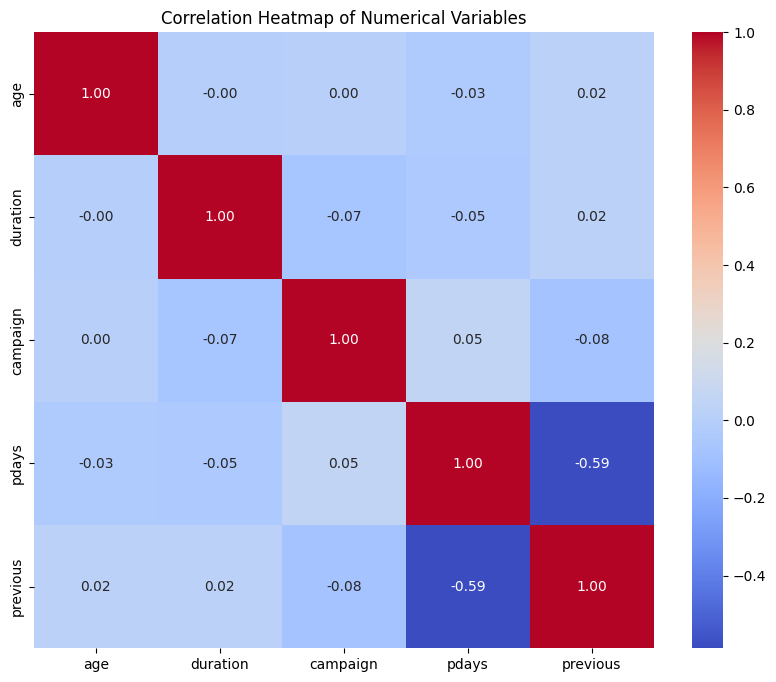

In [31]:
# Correlation of numerical variables
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

## Predictive Modeling (Logistic Regression)

In [34]:


# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns excluding the target variable 'y'
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('y')

# Apply one-hot encoding to categorical columns
X_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode the target variable 'y'
le = LabelEncoder()
y_encoded = le.fit_transform(df['y'])

print("Shape of X_encoded:", X_encoded.shape)
print("Shape of y_encoded:", y_encoded.shape)
print("First 5 rows of X_encoded:")
print(X_encoded.head())
print("First 5 values of y_encoded:")
print(y_encoded[:5])

# Predictions
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = X_encoded
y = y_encoded

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_encoded: (41188, 54)
Shape of y_encoded: (41188,)
First 5 rows of X_encoded:
   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ... month_may  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      True      False      False   
1          -36.4      4.857       5191.0  ...      True      False      False   
2          -36.4      4.857       5191.0  ...      True      False      False   
3          -36.4      4.857       5191.0  ...      True      False      False   
4          -36.4      4.857       5191.0  ..

In [41]:
# Feature importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")
y_pred = model.predict(X_test)
print("Predictions made successfully. First 5 predictions:")
print(y_pred[:5])




Logistic Regression model trained successfully.
Predictions made successfully. First 5 predictions:
[0 0 0 0 0]
